In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [79]:
with open("Noir_aveclumière_2711.txt", "r") as file:
    photons = []
    wavelength = []
    reading = False
    for i, line in enumerate(file):
        if i==2305:
            reading = True
        elif i==2445:
            reading = False
        if reading:
            values = line.split()
            if len(values) == 2:  # Ensure the line has exactly 2 columns
                Lambda = values[0].replace(",", ".")
                valeur = values[1].replace(",",".")
                wavelength.append(float(Lambda))
                photons.append(float(valeur))

In [80]:
noir = "Noir_aveclumière_2711.txt"

bleu = "bleu_66deg_100mW_3s_2avg_2boxcar.txt"

In [107]:
indice_deb = 2305
indice_fin = 2445

def extraction_valeurs(filename):
    with open(filename, "r") as file:
        photons = []
        wavelengths = []
        reading = False
        for i, line in enumerate(file):
            if i==indice_deb:
                reading = True
            elif i==indice_fin:
                reading = False
            if reading:
                values = line.split()
                if len(values) == 2:  # Ensure the line has exactly 2 columns
                    Lambda = values[0].replace(",", ".")
                    valeur = values[1].replace(",",".")
                    wavelengths.append(float(Lambda))
                    photons.append(float(valeur))
    return(np.array(wavelengths), np.array(photons))

In [82]:
wavelengths, photons = extraction_valeurs(noir)

valeurs_noir = pd.Series(photons)

caract_noir = valeurs_noir.describe()

avg_noir = caract_noir["mean"]

In [83]:
wavelengths_bleu, photons_bleu = extraction_valeurs(bleu)

valeurs_bleu = pd.Series(photons)

caract_bleu = valeurs_noir.describe()

avg_bleu = caract_bleu["mean"]

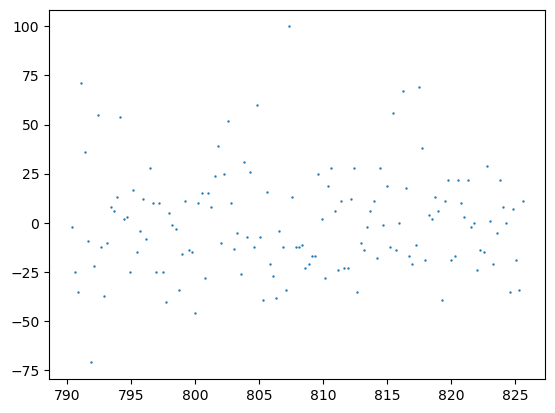

In [84]:
plt.scatter(wavelength, photons-avg_bleu, s = 0.5)

In [85]:
def calcul_fwhm(profil):
    """
    Calcule la FWHM (Full Width at Half Maximum) d'un profil donné sous la forme
    [abscisses, ordonnées].

    :param profil: Liste de longueur 2 [abscisses, ordonnées]
    :return: La FWHM du profil
    """
    # Extraire les abscisses et ordonnées du profil
    x = np.array(profil[0])
    y = np.array(profil[1])

    # Trouver la valeur maximale du profil (ordonnée)
    y_max = np.max(y)
    
    # Calculer la moitié du maximum
    half_max = y_max / 2.0
    
    # Trouver les indices où l'ordonnée atteint la moitié du maximum
    # Cela peut être fait en cherchant où l'ordonnée croise cette valeur
    indices_above_half_max = np.where(y >= half_max)[0]
    
    # Vérifier qu'il existe bien deux indices où l'ordonnée dépasse la moitié du maximum
    if len(indices_above_half_max) < 2:
        print("Erreur : Le profil ne semble pas avoir une FWHM claire.")
        return None
    
    # Prendre le premier et le dernier indice où y dépasse half_max
    x_left = x[indices_above_half_max[0]]
    x_right = x[indices_above_half_max[-1]]
    
    # Calculer la FWHM comme la différence entre ces deux abscisses
    fwhm = x_right - x_left

    return fwhm

In [123]:
def extraire_temp(chaine):
    """
    Extrait la température à partir d'une chaîne contenant un format 'Txx' ou 'Txx.xx'.

    Args:
        chaine (str): Chaîne à analyser.

    Returns:
        float: La température extraite.
    """
    # Expression régulière pour extraire un entier ou un float après 'T'
    match = re.search(r"T(\d+(?:\.\d{1,2})?)", chaine)

    # Vérification si la correspondance a été trouvée
    if match:
        return float(match.group(1))  # Convertir la chaîne capturée en float
    else:
        print(f"Aucune température trouvée dans la chaîne : {chaine}")
        return None  # Retourner None si aucune correspondance n'est trouvée

def extraction_profils_temperature(folder_name):
    couples_profils = []
    
    for nom_fichier in os.listdir(folder_name):
        # Filtrer les fichiers commençant par un point ou contenant des extensions non pertinentes
        if nom_fichier.startswith('.') or 'checkpoints' in nom_fichier:
            continue
        
        chemin_fichier = os.path.join(folder_name, nom_fichier)
        
        # Assurez-vous que c'est un fichier et pas un répertoire
        if not os.path.isfile(chemin_fichier):
            continue

        valeur_temperature = extraire_temp(nom_fichier)
        
        couple_profil = extraction_valeurs(chemin_fichier)
        
        couples_profils.append([valeur_temperature, couple_profil])

    return couples_profils

In [87]:
"""couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

plt.figure(figsize=(10, 6), dpi=300)

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_temp):
    
    if i in range(0,14):
    
        wavelengths, photons = couple[0], couple[1]
    
        photons = photons - photons_bleu
    
        fwhm = calcul_fwhm([wavelengths, photons])
    
        print(fwhm)
    
        # Tracer le scatter plot dans l'axe i
        plt.plot(wavelengths, photons,"+-", markersize = 0.5, linewidth=0.5, label=i)
        plt.legend()
        plt.grid(True)  # Active la grille principale
    
        # Ajout de la sous-grille
        plt.minorticks_on()  # Active les "ticks" mineurs


# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()"""

'couples_profils_temp = extraction_profils_temperature("Donnees_temperature")\n\nplt.figure(figsize=(10, 6), dpi=300)\n\n# Pour chaque couple, créer un scatter plot dans le subplot correspondant\nfor i, couple in enumerate(couples_profils_temp):\n    \n    if i in range(0,14):\n    \n        wavelengths, photons = couple[0], couple[1]\n    \n        photons = photons - photons_bleu\n    \n        fwhm = calcul_fwhm([wavelengths, photons])\n    \n        print(fwhm)\n    \n        # Tracer le scatter plot dans l\'axe i\n        plt.plot(wavelengths, photons,"+-", markersize = 0.5, linewidth=0.5, label=i)\n        plt.legend()\n        plt.grid(True)  # Active la grille principale\n    \n        # Ajout de la sous-grille\n        plt.minorticks_on()  # Active les "ticks" mineurs\n\n\n# Ajuster les espacements entre les subplots\nplt.tight_layout()\nplt.show()'

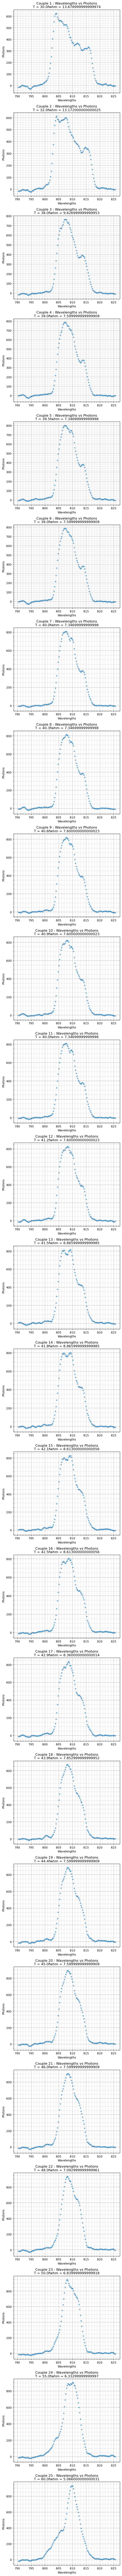

In [88]:
couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

fig, axes = plt.subplots(len(couples_profils_temp), 1, figsize=(6, len(couples_profils_temp)*5))

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_temp):

    valeur_temp, couple_profil = couple[0], couple[1]
    
    wavelengths, photons = couple_profil[0], couple_profil[1]
    
    photons = photons - photons_bleu
    
    fwhm = calcul_fwhm([wavelengths, photons])
    
     # Tracer le scatter plot dans l'axe i
    axes[i].plot(wavelengths, photons, "+", linewidth=0.5)
    axes[i].set_title(f'Couple {i+1} : Wavelengths vs Photons'+"\nT = "+str(valeur_temp)+"fwhm = "+str(fwhm))
    axes[i].set_xlabel('Wavelengths')
    axes[i].set_ylabel('Photons')
    axes[i].grid(True)  # Active la grille principale
    
    # Ajout de la sous-grille
    axes[i].minorticks_on()  # Active les "ticks" mineurs
    axes[i].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')  # Sous-grille (grille mineure)

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

In [186]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

inf = np.inf

# Définition des fonctions pour les modèles
def gaussian(x, a1, x1, sigma1):
    return a1 * np.exp(-((x - x1) ** 2) / (2 * sigma1 ** 2))

def double_gaussian(x, a1, x1, sigma1, a2, x2, sigma2):
    return (a1 * np.exp(-((x - x1) ** 2) / (2 * sigma1 ** 2)) +
            a2 * np.exp(-((x - x2) ** 2) / (2 * sigma2 ** 2)))

def triple_gaussian(x, a1, x1, sigma1, a2, x2, sigma2, a3, x3, sigma3):
    return (a1 * np.exp(-((x - x1) ** 2) / (2 * sigma1 ** 2)) +
            a2 * np.exp(-((x - x2) ** 2) / (2 * sigma2 ** 2)) +
            a3 * np.exp(-((x - x3) ** 2) / (2 * sigma3 ** 2)))

# Fonction pour le fit
def fit_gaussian(x_data, y_data, model="gaussian", initial_params=None, bounds=None):
    """
    Ajuste les données à une gaussienne, double gaussienne ou triple gaussienne avec des bornes optionnelles.

    Args:
        x_data (array-like): Les abscisses des données.
        y_data (array-like): Les ordonnées des données.
        model (str): Le modèle à utiliser ("gaussian", "double_gaussian", "triple_gaussian").
        initial_params (list): Les paramètres initiaux pour l'ajustement.
        bounds (tuple): Les bornes inférieures et supérieures pour les paramètres sous la forme (lower, upper).

    Returns:
        tuple: Les paramètres ajustés et la fonction utilisée pour l'ajustement.
    """
    if model == "gaussian":
        func = gaussian
        if initial_params is None:
            initial_params = [1, np.mean(x_data), np.std(x_data)]
        if bounds is None:
            bounds = ([-np.inf, min(x_data), 0], [np.inf, max(x_data), np.inf])
    elif model == "double_gaussian":
        func = double_gaussian
        if initial_params is None:
            initial_params = [1, np.mean(x_data), np.std(x_data), 
                              0.5, np.mean(x_data) + 1, np.std(x_data) / 2]
        if bounds is None:
            bounds = (
                [-np.inf, min(x_data), 0, -np.inf, min(x_data), 0],
                [np.inf, max(x_data), np.inf, np.inf, max(x_data), np.inf]
            )
    elif model == "triple_gaussian":
        func = triple_gaussian
        if initial_params is None:
            initial_params = [1, np.mean(x_data), np.std(x_data),
                              0.5, np.mean(x_data) + 1, np.std(x_data) / 2,
                              0.3, np.mean(x_data) - 1, np.std(x_data) / 3]
        if bounds is None:
            bounds = (
                [-np.inf, min(x_data), 0, -np.inf, min(x_data), 0, -np.inf, min(x_data), 0],
                [np.inf, max(x_data), np.inf, np.inf, max(x_data), np.inf, np.inf, max(x_data), np.inf]
            )
    else:
        raise ValueError("Modèle inconnu. Choisissez 'gaussian', 'double_gaussian' ou 'triple_gaussian'.")

    # Ajustement des données avec les bornes
    params, cov_matrix = curve_fit(func, x_data, y_data, p0=initial_params, bounds=bounds, )

    return params, func

couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

couple = couples_profils_temp[10]

valeur_temp, couple_profil = couple[0], couple[1]

wavelengths, photons = couple_profil[0], couple_profil[1]
    
photons = photons - photons_bleu

x_data, y_data = wavelengths, photons

# Paramètres et bornes pour triple_gaussian

parametres_initiaux_triple = [800,  802.85281705,    1.35663132,  350.17005795,  807.89094096, 3.51003894,  204.72928693,  814.40901359,    1.06650528]
parametres_initiaux_double = [350, 804, 3, 350, 809, 3]
parametres_initiaux_simple = [350, 804, 3]

parametres_initiaux_intervalle_simple = (
    [-inf, 800, 0],  # Bornes inférieures
    [+inf, 820, +inf]  # Bornes supérieures
)
parametres_initiaux_intervalle_double = (
    [100, 780, 0, 100, 808, 0],  # Bornes inférieures
    [+inf, 850, +inf, +inf, 850, +inf]  # Bornes supérieures
)
parametres_initiaux_intervalle_triple = (
    [0, 800, 0, 0, 800, 0, 0, 800, 0],  # Bornes inférieures
    [+inf, 820, +inf, +inf, 820, +inf, +inf, 820, +inf]  # Bornes supérieures
)

# Ajustement avec triple_gaussian
params, fitted_func = fit_gaussian(
    x_data, y_data,
    model="triple_gaussian",
    initial_params=parametres_initiaux_triple,
    bounds=parametres_initiaux_intervalle_triple
)

# Affichage des résultats
plt.scatter(x_data, y_data, label="Données", s=10)
plt.plot(x_data, fitted_func(x_data, *params), label="Fit", color="red")
plt.legend()
plt.title("Ajustement avec triple gaussienne")
plt.show()

print("Paramètres ajustés:", params)

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

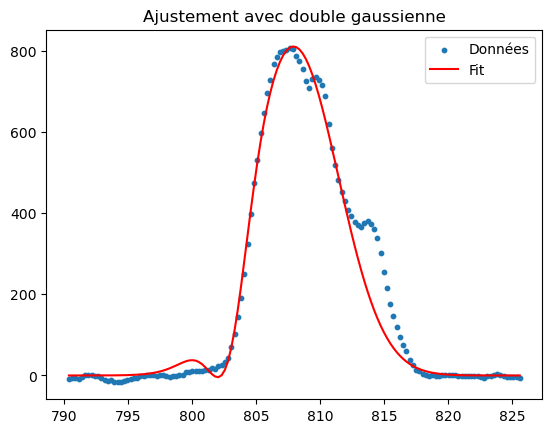

Paramètres ajustés: [-247, 802.85281705, 1.35663132, 811.17005795, 807.89094096, 3.51003894, 0, 814.40901359, 1.06650528]


In [90]:
params = [-247,  802.85281705,    1.35663132,  811.17005795,  807.89094096, 3.51003894,  0,  814.40901359,    1.06650528]

plt.scatter(x_data, y_data, label="Données", s=10)
plt.plot(x_data, fitted_func(x_data, *params), label="Fit", color="red")
plt.legend()
plt.title("Ajustement avec double gaussienne")
plt.show()

print("Paramètres ajustés:", params)

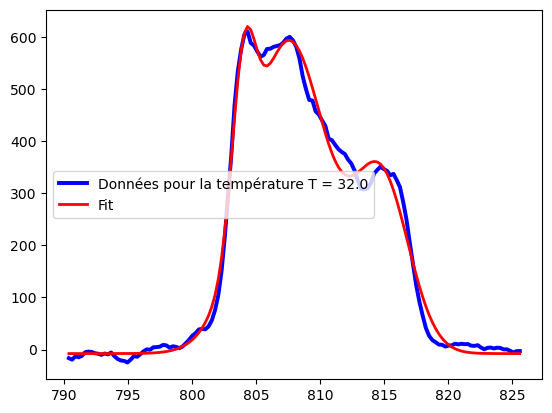

Paramètres ajustés :  [328.52725536 814.77366395   3.04341153 305.48958273 803.99761848
   1.28088484 599.67640402 807.52342384   4.26037665  -7.84536314]


In [189]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Paramètres de fit
lower_bound = [100, 750, 0,
               100, 750, 0,
               100, 750, 0,
               -10]

upper_bound = [np.inf, 850, np.inf,
               np.inf, 850, np.inf,
               np.inf, 850, np.inf,
               30]

initial_guess = [300, 813, 3,
                 700, 807, 5,
                 700, 808, 5,
                 0]

# Exemple sur 3 gaussiennes
x = np.linspace(-20, 20, 10000)
y = (3 * np.exp(-(x - 11)**2 / 4) +
     2 * np.exp(-(x + 6)**2 / 2) +
     3.4 * np.exp(-(x - 12)**2 / 6) +
     0.1)

y_noise = y + 0.05 * np.random.randn(len(y))

#Configuration des données pour le fit
couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

#10eme température sélectionnée
couple = couples_profils_temp[1]

valeur_temp, couple_profil = couple[0], couple[1]

wavelengths, photons = couple_profil[0], couple_profil[1]
    
photons = photons - photons_bleu

x_data, y_data = wavelengths, photons

plt.figure()
plt.plot(x_data, y_data, 'b', linewidth=2.83, label='Données pour la température T = '+str(valeur_temp))

# Définir le modèle de fit
def gaussians(x, I1, t1, s1, I2, t2, s2, I3, t3, s3, bckg):
    gauss1 = I1 * np.exp(-(x - t1)**2 / s1**2)
    gauss2 = I2 * np.exp(-(x - t2)**2 / s2**2)
    gauss3 = I3 * np.exp(-(x - t3)**2 / s3**2)
    return gauss1 + gauss2 + gauss3 + bckg

# Fit des données
popt, pcov = curve_fit(gaussians, x_data, y_data, p0=initial_guess, bounds=(lower_bound, upper_bound))

# Tracer la courbe ajustée
plt.plot(x_data, gaussians(x_data, *popt), 'r', linewidth=2, label='Fit')
plt.legend()
plt.show()

# Affichage des résultats du fit
print("Paramètres ajustés : ", popt)

In [93]:
"""couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

fig, axes = plt.subplots(len(couples_profils_temp), 1, figsize=(6, len(couples_profils_temp)*5))

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_temp):

    valeur_temp, couple_profil = couple[0], couple[1]
    
    wavelengths, photons = couple_profil[0], couple_profil[1]
    
    photons = photons - photons_bleu
    
    x_data, y_data = wavelengths, photons
    
    # Ajustement avec triple_gaussian
    params, fitted_func = fit_gaussian(
    x_data, y_data,
    model="triple_gaussian",
    initial_params=parametres_initiaux_triple,
    bounds=parametres_initiaux_intervalle_triple
    )

    # Affichage des résultats
    plt.scatter(x_data, y_data, label="Données", s=10)
    plt.plot(x_data, fitted_func(x_data, *params), label="Fit", color="red")
    plt.legend()
    plt.title("Ajustement avec triple gaussienne "+str(valeur_temp))
    plt.show()

    axes[i].grid(True)  # Active la grille principale
    
    # Ajout de la sous-grille
    axes[i].minorticks_on()  # Active les "ticks" mineurs
    axes[i].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')  # Sous-grille (grille mineure)

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()"""

'couples_profils_temp = extraction_profils_temperature("Donnees_temperature")\n\nfig, axes = plt.subplots(len(couples_profils_temp), 1, figsize=(6, len(couples_profils_temp)*5))\n\n# Pour chaque couple, créer un scatter plot dans le subplot correspondant\nfor i, couple in enumerate(couples_profils_temp):\n\n    valeur_temp, couple_profil = couple[0], couple[1]\n    \n    wavelengths, photons = couple_profil[0], couple_profil[1]\n    \n    photons = photons - photons_bleu\n    \n    x_data, y_data = wavelengths, photons\n    \n    # Ajustement avec triple_gaussian\n    params, fitted_func = fit_gaussian(\n    x_data, y_data,\n    model="triple_gaussian",\n    initial_params=parametres_initiaux_triple,\n    bounds=parametres_initiaux_intervalle_triple\n    )\n\n    # Affichage des résultats\n    plt.scatter(x_data, y_data, label="Données", s=10)\n    plt.plot(x_data, fitted_func(x_data, *params), label="Fit", color="red")\n    plt.legend()\n    plt.title("Ajustement avec triple gaussienn

A T= 30.0 °C, fwhm =  13.678999999999974
A T= 32.0 °C, fwhm =  13.172000000000025
A T= 38.0 °C, fwhm =  9.626999999999953
A T= 39.0 °C, fwhm =  7.599999999999909
A T= 39.5 °C, fwhm =  7.34699999999998
A T= 39.0 °C, fwhm =  7.599999999999909
A T= 40.0 °C, fwhm =  7.34699999999998
A T= 40.3 °C, fwhm =  7.34699999999998
A T= 40.6 °C, fwhm =  7.600000000000023
A T= 40.9 °C, fwhm =  7.600000000000023
A T= 40.0 °C, fwhm =  7.34699999999998
A T= 41.2 °C, fwhm =  7.600000000000023
A T= 41.5 °C, fwhm =  8.865999999999985
A T= 41.8 °C, fwhm =  8.865999999999985
A T= 42.1 °C, fwhm =  8.613000000000056
A T= 42.5 °C, fwhm =  8.613000000000056
A T= 42.9 °C, fwhm =  8.360000000000014
A T= 43.9 °C, fwhm =  7.852999999999952
A T= 44.4 °C, fwhm =  7.599999999999909
A T= 45.0 °C, fwhm =  7.599999999999909
A T= 46.0 °C, fwhm =  7.599999999999909
A T= 48.0 °C, fwhm =  7.092999999999961
A T= 50.0 °C, fwhm =  6.839999999999918
A T= 55.0 °C, fwhm =  6.33299999999997
A T= 60.0 °C, fwhm =  5.066000000000031


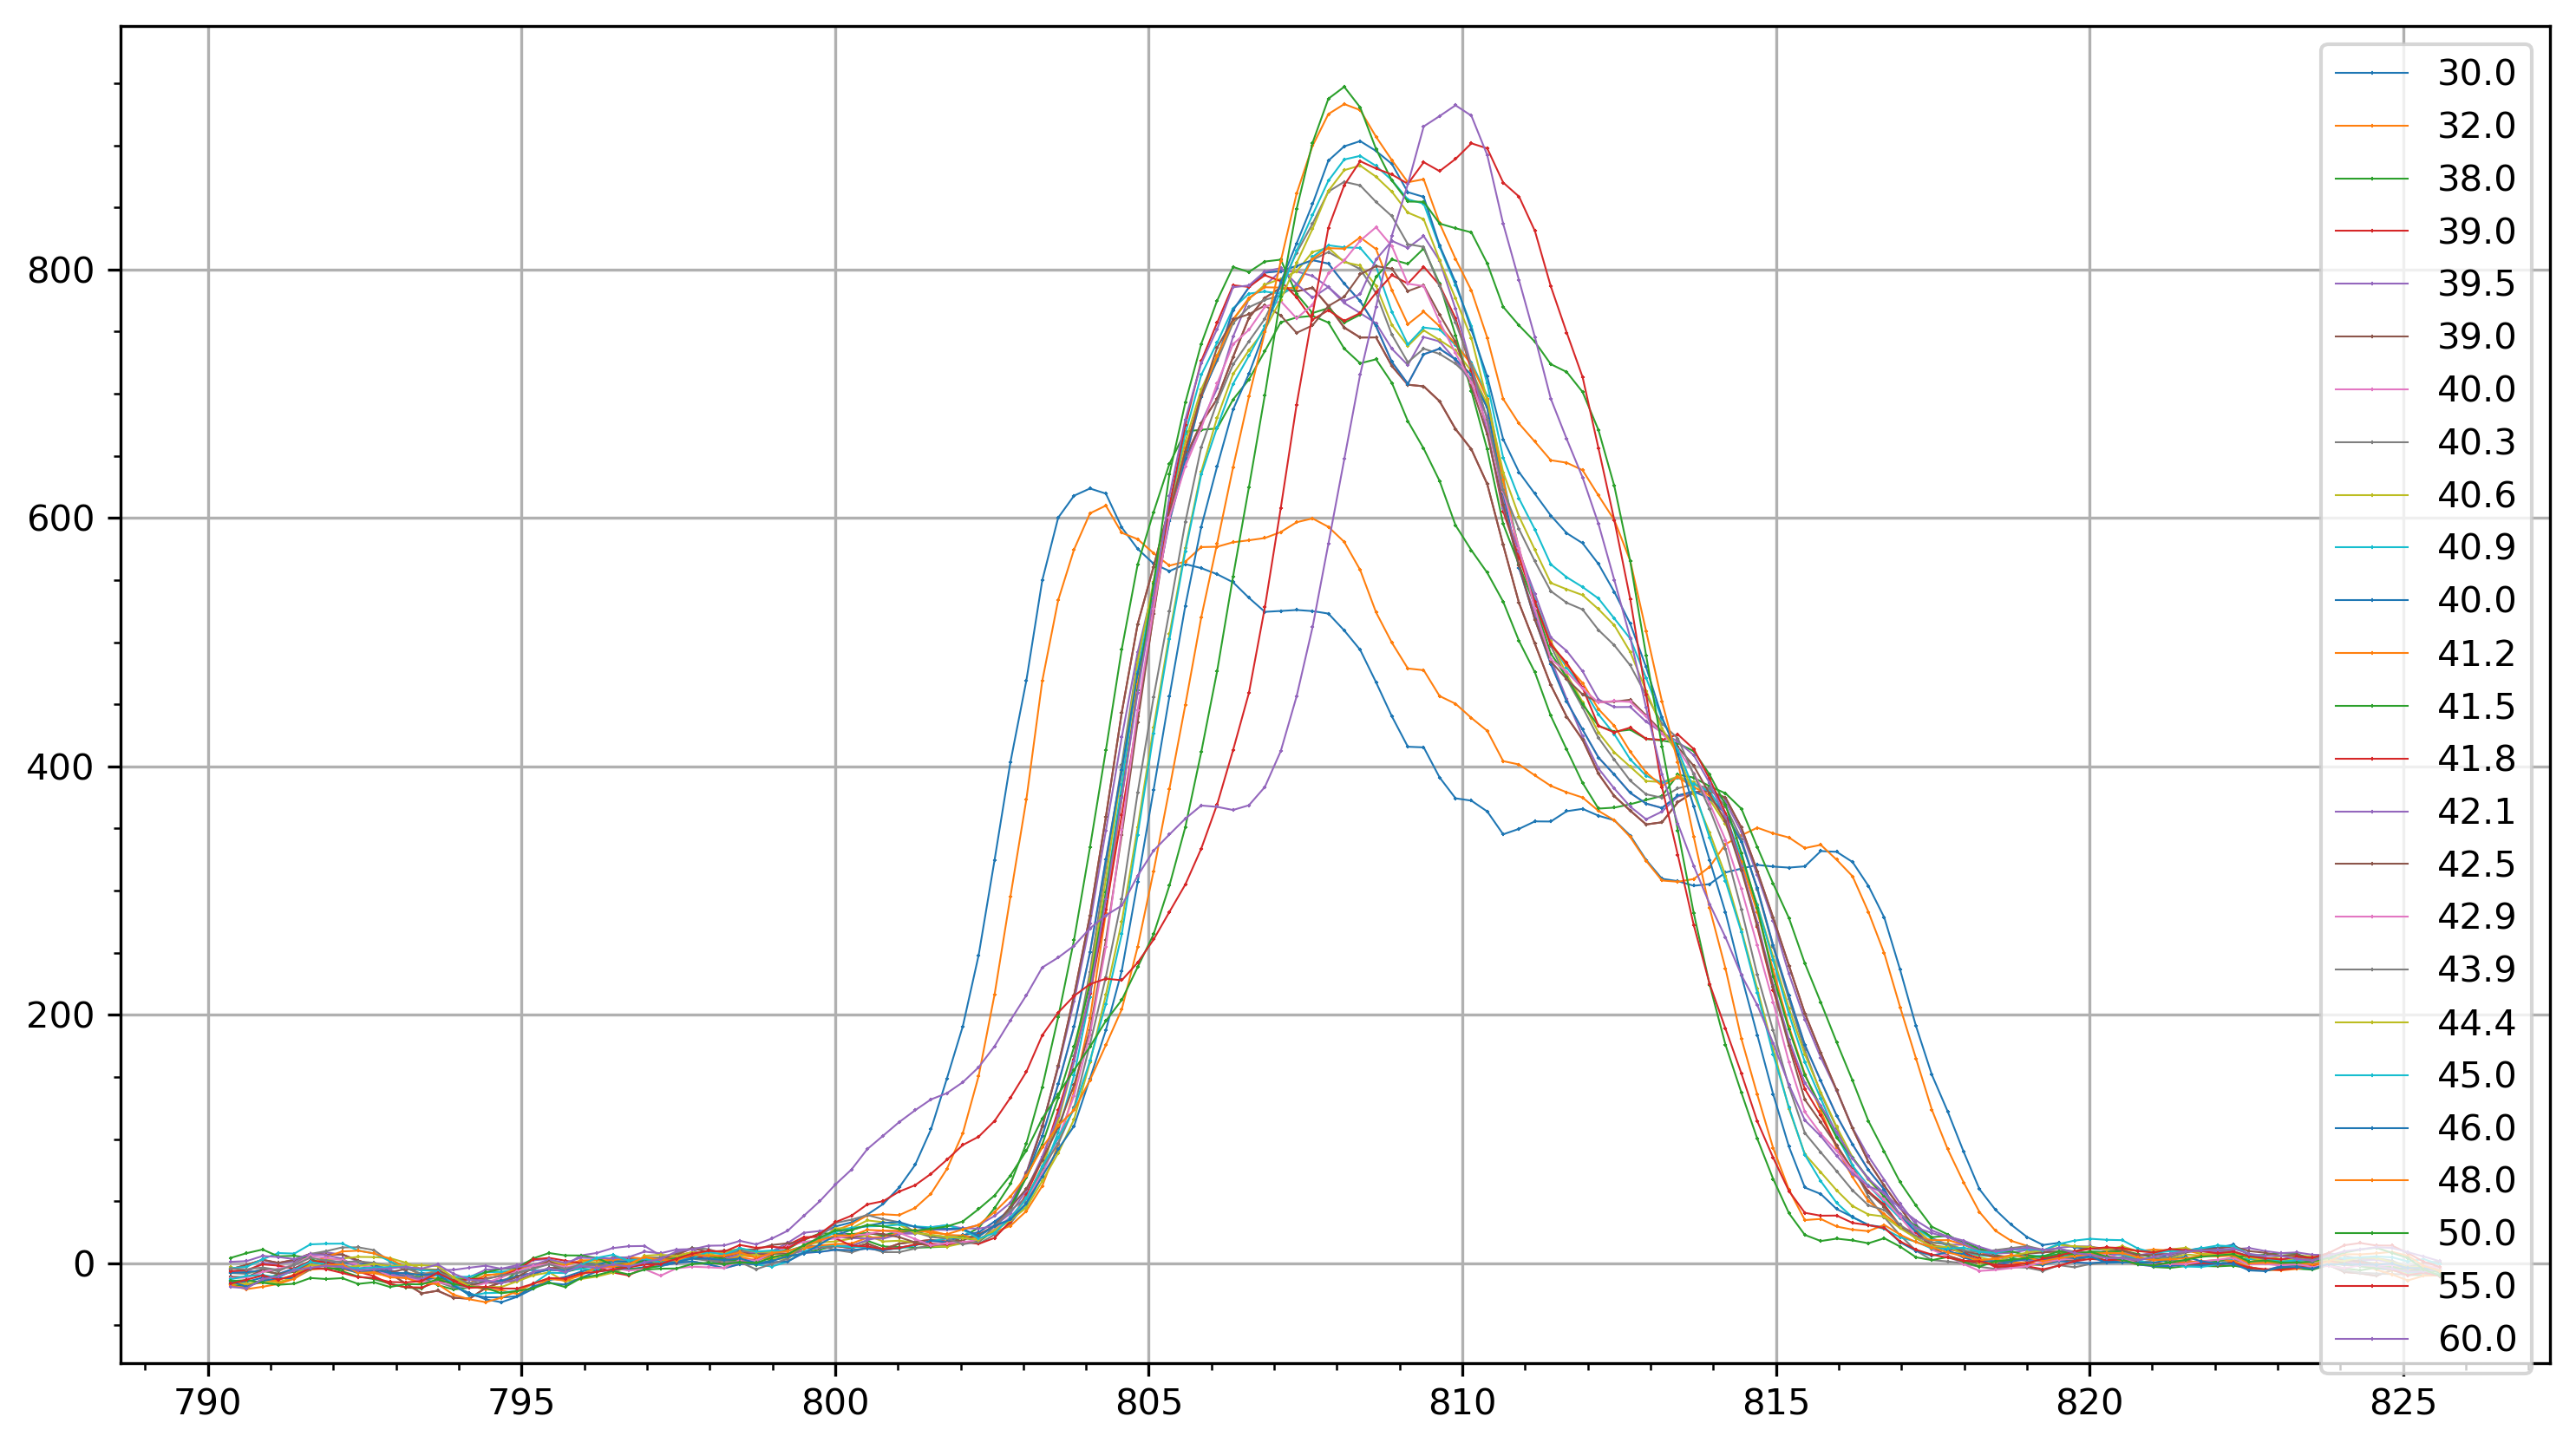

In [94]:
couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

plt.figure(figsize=(10, 6), dpi=300)

FWHM = []
TEMP = []

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_temp):

    valeur_temp, couple_profil = couple[0], couple[1]
    wavelengths, photons = couple_profil[0], couple_profil[1]

    # Ajustement des photons
    photons = photons - photons_bleu
    
    fwhm = calcul_fwhm([wavelengths, photons])

    FWHM.append(fwhm)
    TEMP.append(valeur_temp)
    
    print("A T=",valeur_temp,"°C, fwhm = ",fwhm)
    
    # Tracer le scatter plot dans l'axe i
    plt.plot(wavelengths, photons,"+-", markersize = 0.5, linewidth=0.5, label=valeur_temp)
    plt.legend()
    plt.grid(True)  # Active la grille principale
    
    # Ajout de la sous-grille
    plt.minorticks_on()  # Active les "ticks" mineurs


# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

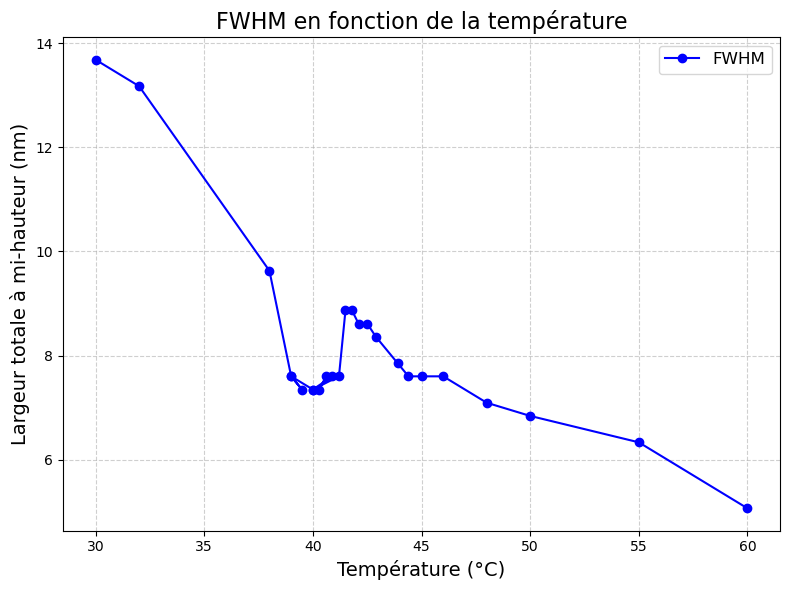

In [95]:
plt.figure(figsize=(8, 6))
plt.plot(TEMP, FWHM, marker='o', linestyle='-', color='blue', label='FWHM')
plt.xlabel("Température (°C)", fontsize=14)
plt.ylabel("Largeur totale à mi-hauteur (nm)", fontsize=14)
plt.title("FWHM en fonction de la température", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

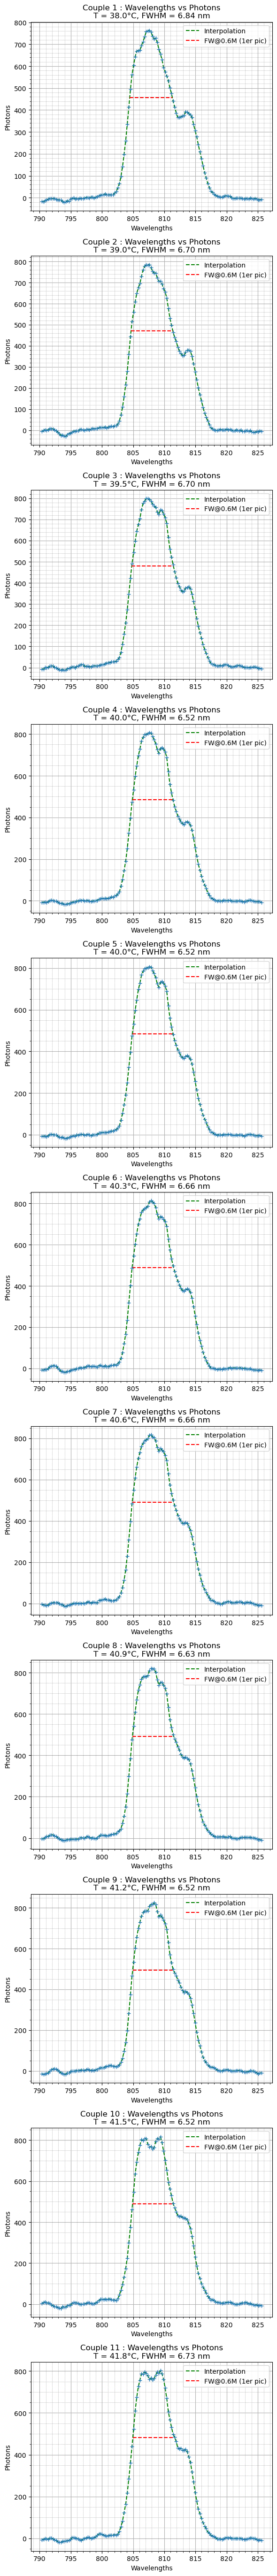

In [162]:
def calcul_fwhm_et_tracer_seuil(profil, seuil, axe=None):
    """
    Calcule la largeur totale à 60% du maximum (FW@0.6M) du premier pic uniquement 
    dans un profil donné. Trace également la courbe interpolée pour vérification.

    :param profil: Liste de longueur 2 [abscisses, ordonnées]
    :param axe: Axe matplotlib où tracer les courbes et la barre horizontale (facultatif)
    :return: La largeur totale à 60% du maximum pour le premier pic
    """
    # Extraire les abscisses et ordonnées
    x = np.array(profil[0])
    y = np.array(profil[1])

    # Trouver le maximum global
    y_max = np.max(y)

    # Définir la hauteur correspondant à 60% du maximum
    target_height = y_max * seuil

    # Interpoler les données pour plus de précision
    interpolateur = interp1d(x, y, kind='linear')
    x_interp = np.linspace(x.min(), x.max(), 1000)  # Plus d'échantillons pour précision
    y_interp = interpolateur(x_interp)

    # Trouver les indices où la courbe interpolée croise le seuil
    # En détectant les changements de signe de (y_interp - target_height)
    diff = y_interp - target_height
    crossing_indices = np.where(np.diff(np.sign(diff)) != 0)[0]

    # Vérifier qu'il existe au moins deux intersections
    if len(crossing_indices) < 2:
        print("Erreur : Moins de deux intersections trouvées au seuil de 60% du maximum.")
        return None

    # Identifier uniquement les deux premières intersections (correspondant au premier pic)
    x_left = (x_interp[crossing_indices[0]] + x_interp[crossing_indices[0] + 1]) / 2
    x_right = (x_interp[crossing_indices[1]] + x_interp[crossing_indices[1] + 1]) / 2

    # Calculer la largeur à 60% du maximum pour le premier pic
    fwhm = x_right - x_left

    # Tracer les résultats si un axe est fourni
    if axe is not None:
        # Tracer les données interpolées
        axe.plot(x_interp, y_interp, label="Interpolation", color="green", linestyle="--", linewidth=1.5)
        # Tracer une barre horizontale au niveau de la hauteur cible
        axe.hlines(target_height, x_left, x_right, colors='red', linestyle='--', label='FW@0.6M (1er pic)')
        axe.legend()

    return fwhm

indice_deb_temp = 2
indice_fin_temp = 13
nb_points = indice_fin_temp - indice_deb_temp

# Extraction des données (remplacer par vos données réelles)
couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

# Trier la liste par les valeurs croissantes de a
couples_profils_temp_trie = sorted(couples_profils_temp, key=lambda couple: couple[0])

# Initialisation du plot
fig, axes = plt.subplots(nb_points, 1, figsize=(6, nb_points * 5))

Largeurs = []
TEMP = []

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_temp_trie):

    if i in range(indice_deb_temp, indice_fin_temp):
        
        i = i-indice_deb_temp
    
        valeur_temp, couple_profil = couple[0], couple[1]
    
        wavelengths, photons = couple_profil[0], couple_profil[1]

        # Ajuster les photons en fonction de photons_bleu

        photons = photons - photons_bleu
    
        # Calculer la FWHM et tracer la barre correspondante
        fwhm = calcul_fwhm_et_tracer_seuil([wavelengths, photons],0.6 ,axe=axes[i])
    
        Largeurs.append(fwhm)
        TEMP.append(valeur_temp)
    
        # Tracer le scatter plot dans l'axe i
        axes[i].plot(wavelengths, photons, "+", linewidth=0.5, label="Données")
        axes[i].set_title(f'Couple {i+1} : Wavelengths vs Photons\nT = {valeur_temp}°C, FWHM = {fwhm:.2f} nm')
        axes[i].set_xlabel('Wavelengths')
        axes[i].set_ylabel('Photons')
        axes[i].grid(True)  # Active la grille principale
    
        # Ajout de la sous-grille
        axes[i].minorticks_on()  # Active les "ticks" mineurs
        axes[i].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')  # Sous-grille (grille mineure)

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

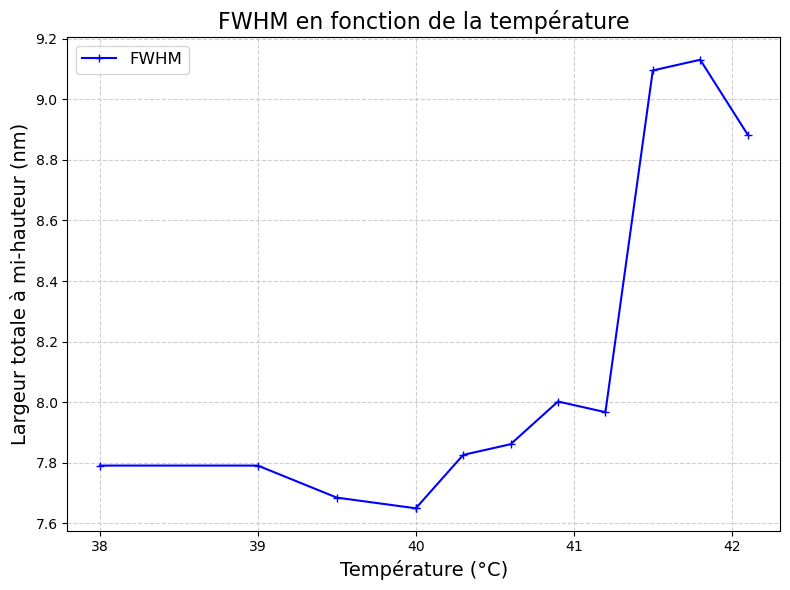

In [125]:
plt.figure(figsize=(8, 6))
plt.plot(TEMP, Largeurs, marker='+', linestyle='-', color='blue', label='FWHM')
plt.xlabel("Température (°C)", fontsize=14)
plt.ylabel("Largeur totale à mi-hauteur (nm)", fontsize=14)
plt.title("FWHM en fonction de la température", fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

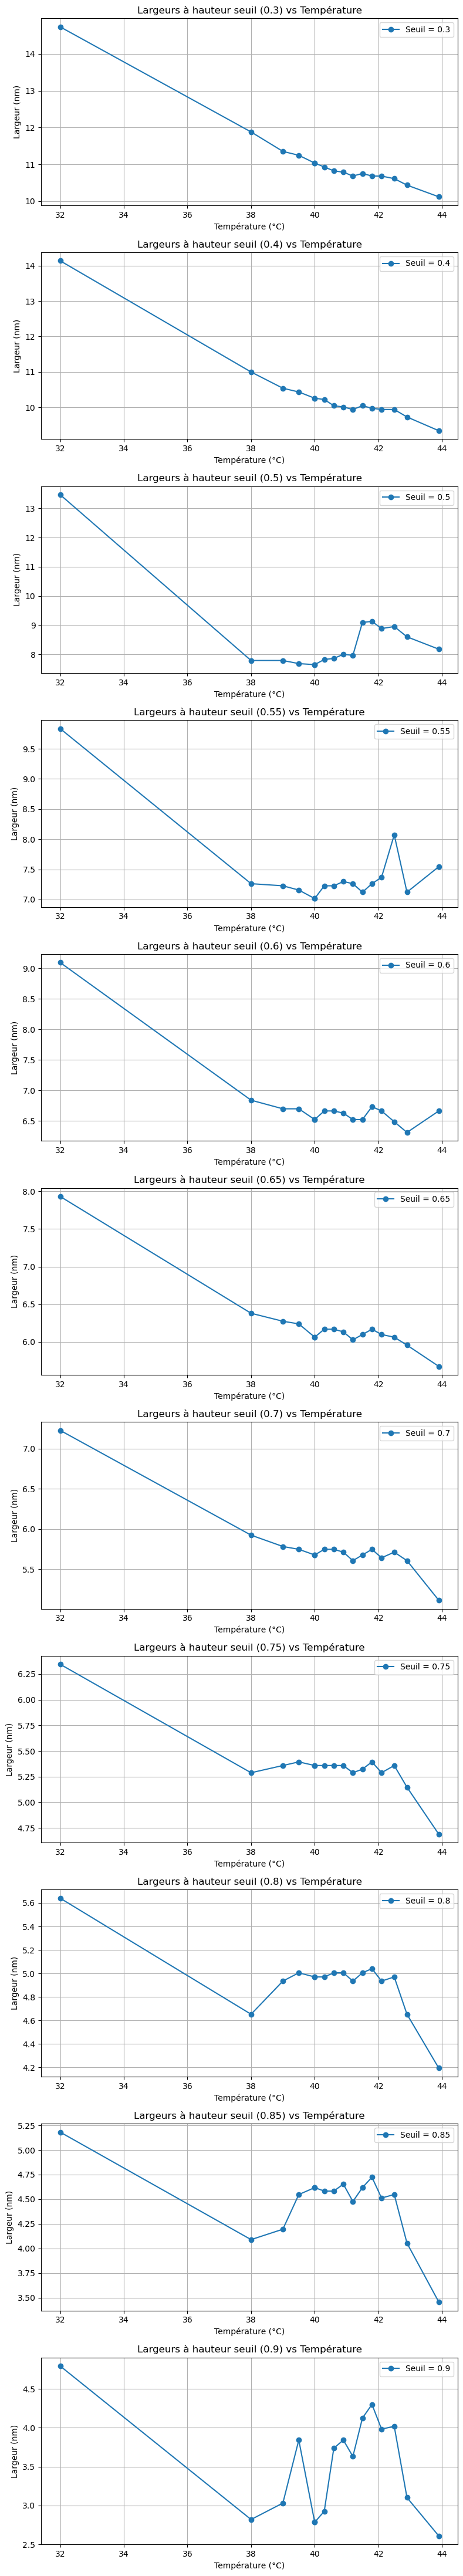

In [165]:
indice_deb_temp = 1
indice_fin_temp = 16
nb_points = indice_fin_temp - indice_deb_temp

Seuils = [0.3, 0.4, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9]
        
# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

nb_subplots = len(Seuils)

fig, axes = plt.subplots(nb_subplots, 1, figsize=(8, nb_subplots * 4))

for idx, seuil in enumerate(Seuils):
    # Initialiser les listes pour ce seuil
    TEMP_seuil = []
    Largeurs_seuil = []

    for i, couple in enumerate(couples_profils_temp_trie):
        
        if i in range(indice_deb_temp, indice_fin_temp+1):
        
                i = i-nb_points
            
                valeur_temp, couple_profil = couple[0], couple[1]
            
                wavelengths, photons = couple_profil[0], couple_profil[1]
        
                # Ajuster les photons en fonction de photons_bleu
        
                photons = photons - photons_bleu
            
                # Calculer la FWHM et tracer la barre correspondante
                fwhm = calcul_fwhm_et_tracer_seuil([wavelengths, photons],seuil ,axe=None)
            
                Largeurs_seuil.append(fwhm)
                TEMP_seuil.append(valeur_temp)
    
    # Tracer les largeurs en fonction de la température pour ce seuil
    axes[idx].plot(TEMP_seuil, Largeurs_seuil, '-o', label=f"Seuil = {seuil}")
    axes[idx].set_title(f"Largeurs à hauteur seuil ({seuil}) vs Température")
    axes[idx].set_xlabel("Température (°C)")
    axes[idx].set_ylabel("Largeur (nm)")
    axes[idx].legend()
    axes[idx].grid()

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

RuntimeError: Optimal parameters not found: The maximum number of function evaluations is exceeded.

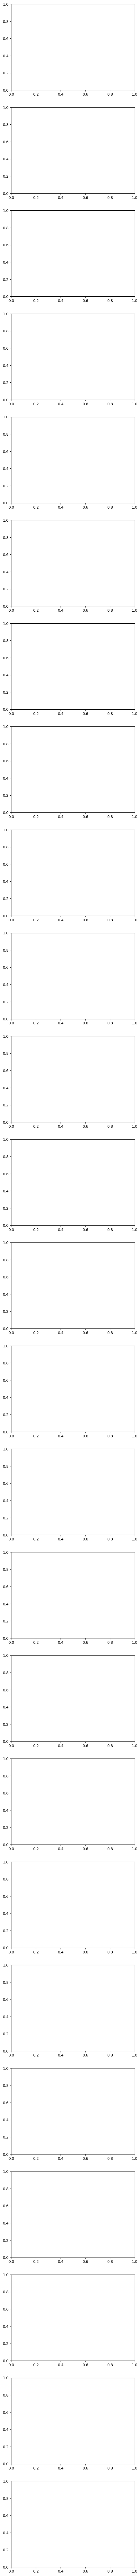

In [50]:
#fit de tous les profils

# Extraire les profils de température
couples_profils_temp = extraction_profils_temperature("Donnees_temperature")

# Création des subplots
fig, axes = plt.subplots(len(couples_profils_temp), 1, figsize=(6, len(couples_profils_temp) * 5))

# Vérifier si len(couples_profils_temp) == 1 pour éviter les problèmes avec "axes" non itérable
if len(couples_profils_temp) == 1:
    axes = [axes]

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_temp):
    valeur_temp, couple_profil = couple[0], couple[1]
    wavelengths, photons = couple_profil[0], couple_profil[1]
    # Ajustement des photons
    photons = photons - photons_bleu
    x_data, y_data = wavelengths, photons

    # Ajustement avec triple_gaussian
    params, fitted_func = fit_gaussian(
        x_data, y_data,
        model="triple_gaussian",
        initial_params=parametres_initiaux_triple,
        bounds=parametres_initiaux_intervalle_triple
    )

    # Affichage des données sur le subplot correspondant
    axes[i].scatter(x_data, y_data, label="Données", s=10)
    axes[i].plot(x_data, fitted_func(x_data, *params), label="Fit", color="red")
    axes[i].legend()
    axes[i].set_title(f"Ajustement avec triple gaussienne - Température : {valeur_temp}")
    axes[i].grid(True)  # Active la grille principale

    # Ajout de la sous-grille
    axes[i].minorticks_on()  # Active les "ticks" mineurs
    axes[i].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')  # Sous-grille (grille mineure)

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()


# Etude de l'angle de la $\frac{\lambda}{2}$

In [190]:
def extraire_angle(chaine):
    """
    Extrait l'angle à partir d'une chaîne contenant un format 'xxdeg' ou 'xx.xxdeg'.

    Args:
        chaine (str): Chaîne à analyser.

    Returns:
        float: L'angle extrait.
    """
    # Expression régulière pour extraire un entier ou un float suivi de 'deg'
    match = re.search(r"(\d+(?:\.\d{1,2})?)deg", chaine)

    # Vérification si la correspondance a été trouvée
    if match:
        return float(match.group(1))  # Convertir la chaîne capturée en float
    else:
        print(f"Aucun angle trouvé dans la chaîne : {chaine}")
        return None  # Retourner None si aucune correspondance n'est trouvée

def extraction_profils_angle(folder_name):
    """
    Extrait les profils et les angles à partir des fichiers dans un dossier donné.

    Args:
        folder_name (str): Chemin du dossier contenant les fichiers.

    Returns:
        list: Une liste de couples [angle, couple_profil], où angle est un float 
              et couple_profil contient les données du profil.
    """
    couples_profils = []
    
    for nom_fichier in os.listdir(folder_name):
        # Filtrer les fichiers non pertinents
        if nom_fichier.startswith('.') or 'checkpoints' in nom_fichier:
            continue
        
        chemin_fichier = os.path.join(folder_name, nom_fichier)
        
        # Assurez-vous que c'est un fichier valide
        if not os.path.isfile(chemin_fichier):
            continue

        # Extraire l'angle à partir du nom du fichier
        valeur_angle = extraire_angle(nom_fichier)
        
        if valeur_angle is not None:  # Si un angle valide est trouvé
            couple_profil = extraction_valeurs(chemin_fichier)
            couples_profils.append([valeur_angle, couple_profil])

    return couples_profils

In [191]:
couples_profils_angle = extraction_profils_angle("Donnees_angle")

# Trier la liste par les valeurs croissantes de l'angle
couples_profils_angle_trie = sorted(couples_profils_angle, key=lambda couple: couple[0])

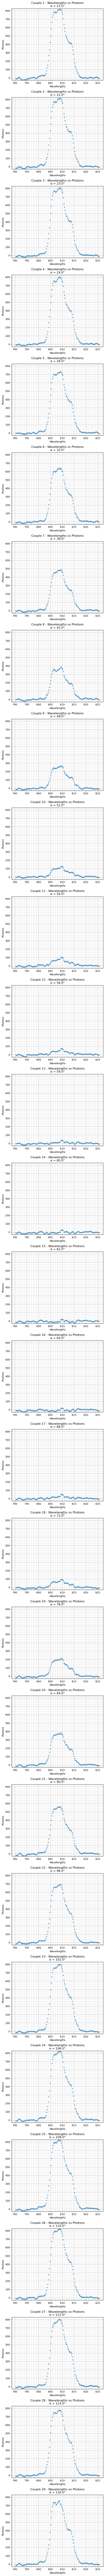

In [181]:
# Calculer les limites globales pour l'échelle verticale
min_photons = float('inf')
max_photons = float('-inf')

for couple in couples_profils_angle_trie:
    wavelengths, photons = couple[1]
    photons = photons - photons_bleu
    min_photons = min(min_photons, np.min(photons))
    max_photons = max(max_photons, np.max(photons))

# Créer les subplots
fig, axes = plt.subplots(len(couples_profils_angle_trie), 1, figsize=(6, len(couples_profils_angle_trie) * 5))

# Tracer chaque couple dans un subplot
for i, couple in enumerate(couples_profils_angle_trie):
    valeur_angle, couple_profil = couple[0], couple[1]
    
    wavelengths, photons = couple_profil[0], couple_profil[1]
    photons = photons - photons_bleu

    # Tracer le scatter plot dans l'axe i
    axes[i].plot(wavelengths, photons, "+", linewidth=0.5)
    axes[i].set_title(f'Couple {i+1} : Wavelengths vs Photons\nα = {valeur_angle}°')
    axes[i].set_xlabel('Wavelengths')
    axes[i].set_ylabel('Photons')
    axes[i].grid(True)  # Activer la grille principale
    
    # Ajout de la sous-grille
    axes[i].minorticks_on()  # Activer les ticks mineurs
    axes[i].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')  # Sous-grille (grille mineure)
    
    # Appliquer les mêmes limites verticales
    axes[i].set_ylim(min_photons, max_photons)

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

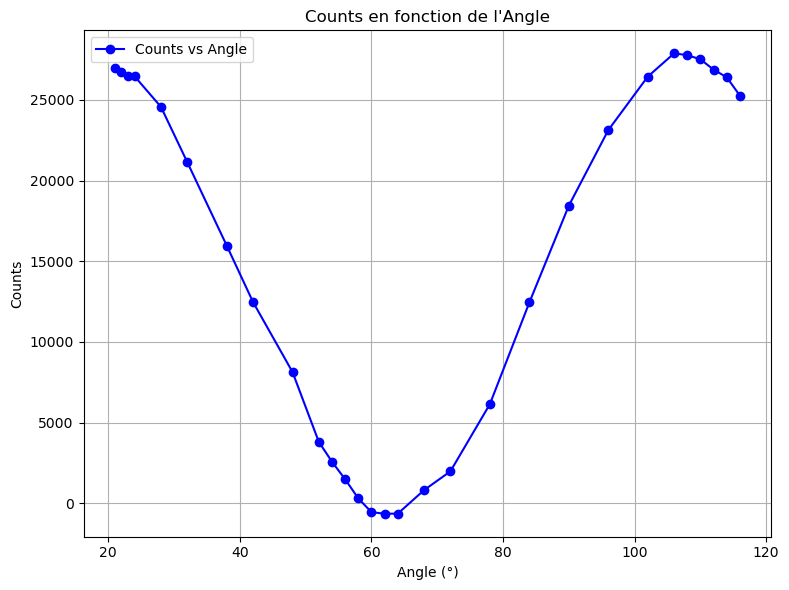

In [195]:
# Initialiser les listes pour les counts et les angles
Counts_list = []
Angles_list = []

# Parcours de chaque couple trié par angle
for couple in couples_profils_angle_trie:
    
    valeur_angle, couple_profil = couple[0], couple[1]
    
    # Extraction des longueurs d'onde (wavelengths) et des photons (intensité)
    wavelengths, photons = couple_profil[0], couple_profil[1]
    
    # Ajuster les photons en fonction de photons_bleu
    photons = photons - photons_bleu

    # Calculer la somme des photons (Counts)
    Counts = photons.sum()

    # Ajouter les valeurs dans les listes correspondantes
    Counts_list.append(Counts)
    Angles_list.append(valeur_angle)

# Tracer les counts en fonction de l'angle
plt.figure(figsize=(8, 6))
plt.plot(Angles_list, Counts_list, 'bo-', label='Counts vs Angle')  # 'bo-' pour des points bleus et lignes
plt.xlabel('Angle (°)')
plt.ylabel('Counts')
plt.title('Counts en fonction de l\'Angle')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Etude de la puissance

In [196]:
def extraire_puissance(chaine):
    """
    Extrait la puissance à partir d'une chaîne contenant un format de type 'xxmW' ou 'xx.xmW'.

    Args:
        chaine (str): Chaîne à analyser.

    Returns:
        float: La puissance extraite.
    """
    # Expression régulière pour extraire un entier ou un float suivi de 'mW'
    match = re.search(r"(\d+(?:\.\d{1,2})?)mW", chaine)

    # Vérification si la correspondance a été trouvée
    if match:
        return float(match.group(1))  # Convertir la chaîne capturée en float
    else:
        print(f"Aucune puissance trouvée dans la chaîne : {chaine}")
        return None  # Retourner None si aucune correspondance n'est trouvée

def extraction_profils_puissance(folder_name):
    """
    Extrait les profils et les puissances à partir des fichiers dans un dossier donné.

    Args:
        folder_name (str): Chemin du dossier contenant les fichiers.

    Returns:
        list: Une liste de couples [puissance, couple_profil], où puissance est un float
              et couple_profil contient les données du profil.
    """
    couples_profils = []
    
    for nom_fichier in os.listdir(folder_name):
        # Filtrer les fichiers non pertinents
        if nom_fichier.startswith('.') or 'checkpoints' in nom_fichier:
            continue
        
        chemin_fichier = os.path.join(folder_name, nom_fichier)
        
        # Assurez-vous que c'est un fichier valide
        if not os.path.isfile(chemin_fichier):
            continue

        # Extraire la puissance à partir du nom du fichier
        valeur_puissance = extraire_puissance(nom_fichier)
        
        if valeur_puissance is not None:  # Si une puissance valide est trouvée
            couple_profil = extraction_valeurs(chemin_fichier)
            couples_profils.append([valeur_puissance, couple_profil])

    return couples_profils

In [197]:
couples_profils_puissance = extraction_profils_puissance("Donnees_puissance")

# Trier la liste par les valeurs croissantes de la puissance
couples_profils_puissance_trie = sorted(couples_profils_puissance, key=lambda couple: couple[0])

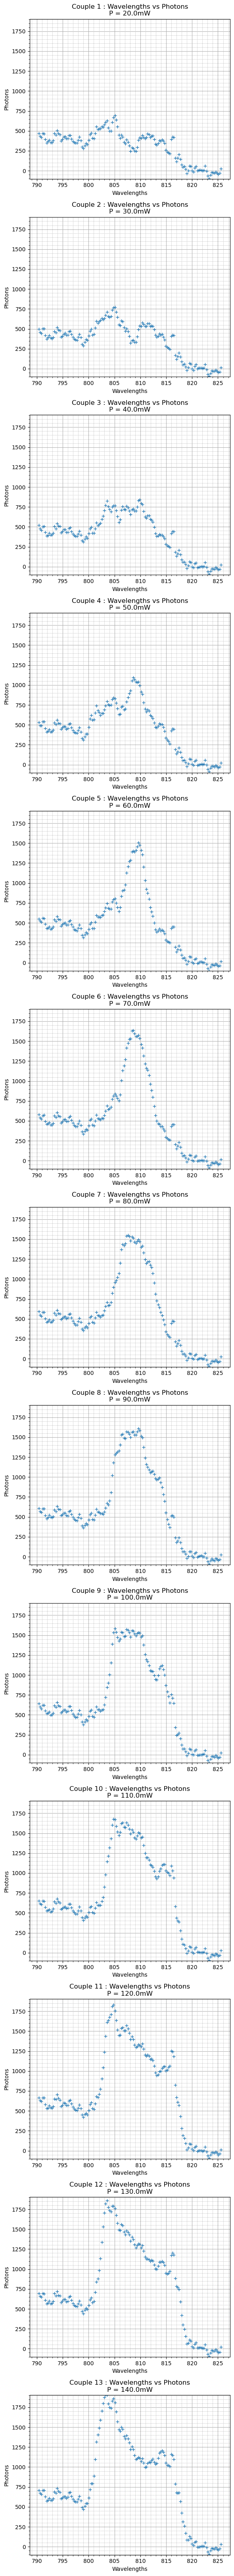

In [276]:
# Calculer les limites globales pour l'échelle verticale
min_photons = float('inf')
max_photons = float('-inf')

for couple in couples_profils_puissance_trie:
    wavelengths, photons = couple[1]
    photons = photons
    min_photons = min(min_photons, np.min(photons))
    max_photons = max(max_photons, np.max(photons))
    
fig, axes = plt.subplots(len(couples_profils_puissance_trie), 1, figsize=(6, len(couples_profils_puissance_trie)*5))

# Pour chaque couple, créer un scatter plot dans le subplot correspondant
for i, couple in enumerate(couples_profils_puissance_trie):

    valeur_puissance, couple_profil = couple[0], couple[1]
    
    wavelengths, photons = couple_profil[0], couple_profil[1]
    
    photons = photons

     # Tracer le scatter plot dans l'axe i
    axes[i].plot(wavelengths, photons, "+", linewidth=0.5)
    axes[i].set_title(f'Couple {i+1} : Wavelengths vs Photons'+"\nP = "+str(valeur_puissance)+"mW")
    axes[i].set_xlabel('Wavelengths')
    axes[i].set_ylabel('Photons')
    axes[i].grid(True)  # Active la grille principale
    
    # Ajout de la sous-grille
    axes[i].minorticks_on()  # Active les "ticks" mineurs
    axes[i].grid(which='minor', linestyle=':', linewidth=0.5, color='gray')  # Sous-grille (grille mineure)

    # Appliquer les mêmes limites verticales
    axes[i].set_ylim(min_photons, max_photons)

# Ajuster les espacements entre les subplots
plt.tight_layout()
plt.show()

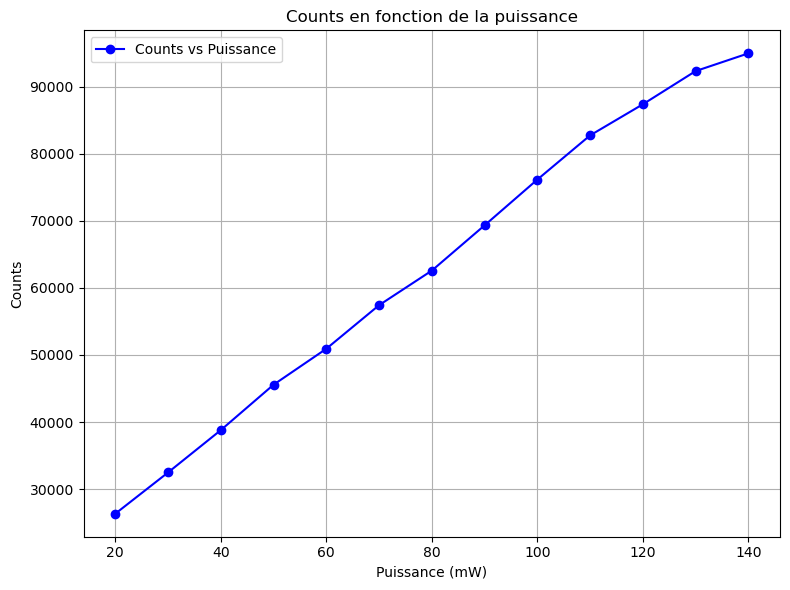

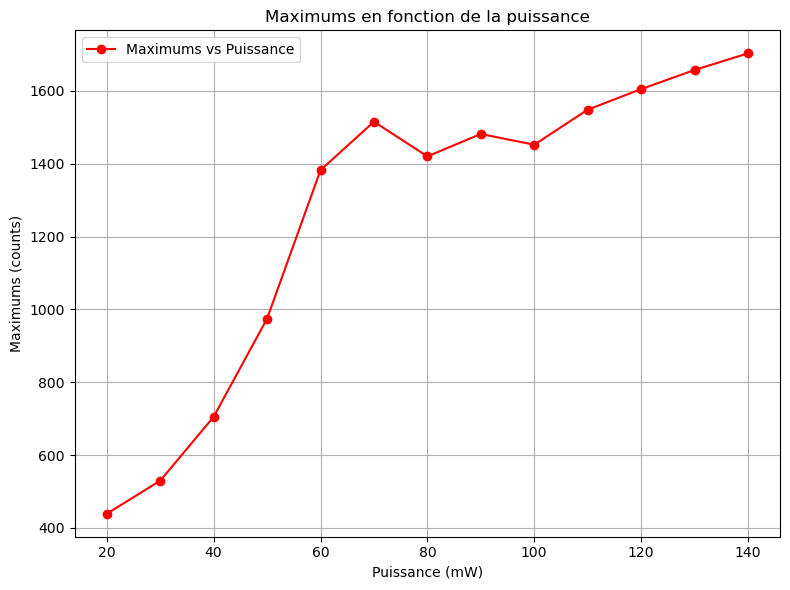

In [216]:
# Initialiser les listes pour les counts, les maximums et les puissances
Counts_list = []
Maximums_list = []
Puissances_list = []

# Parcours de chaque couple trié par puissance
for couple in couples_profils_puissance_trie:
    
    valeur_puissance, couple_profil = couple[0], couple[1]
    
    # Extraction des longueurs d'onde (wavelengths) et des photons (intensité)
    wavelengths, photons = couple_profil[0], couple_profil[1]
    
    # Ajuster les photons en fonction de photons_bleu
    photons = photons - photons_bleu

    # Calculer la somme des photons (Counts) et le maximum
    Counts = photons.sum()
    Maximum = photons.max()

    # Ajouter les valeurs dans les listes correspondantes
    Counts_list.append(Counts)
    Puissances_list.append(valeur_puissance)
    Maximums_list.append(Maximum)

# Tracer les counts en fonction de la puissance
plt.figure(figsize=(8, 6))
plt.plot(Puissances_list, Counts_list, 'bo-', label='Counts vs Puissance')  # 'bo-' pour des points bleus et lignes
plt.xlabel('Puissance (mW)')
plt.ylabel('Counts')
plt.title('Counts en fonction de la puissance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tracer les maximums en fonction de la puissance
plt.figure(figsize=(8, 6))
plt.plot(Puissances_list, Maximums_list, 'ro-', label='Maximums vs Puissance')  # 'ro-' pour des points rouges et lignes
plt.xlabel('Puissance (mW)')
plt.ylabel('Maximums (counts)')
plt.title('Maximums en fonction de la puissance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

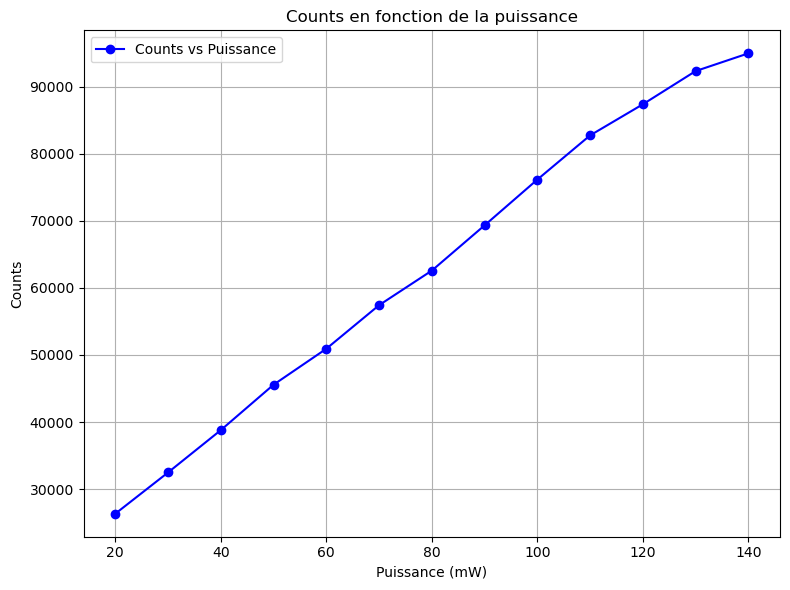

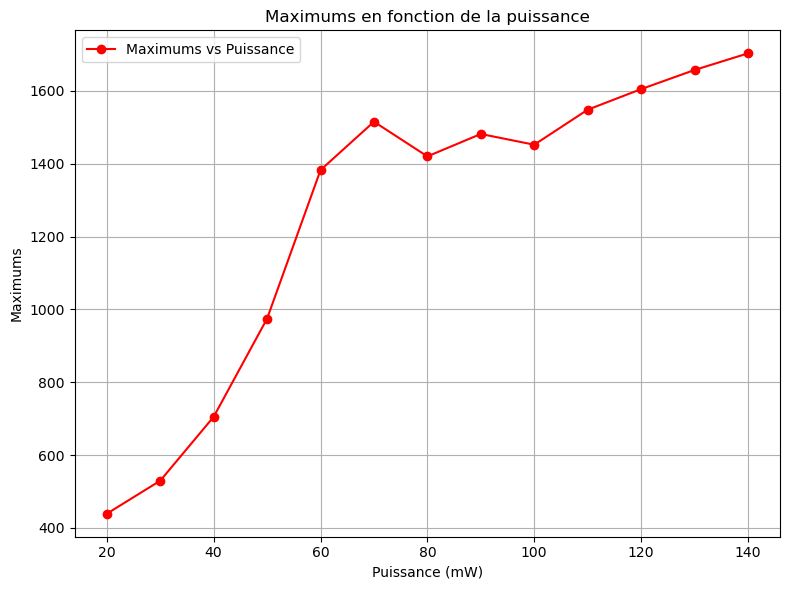

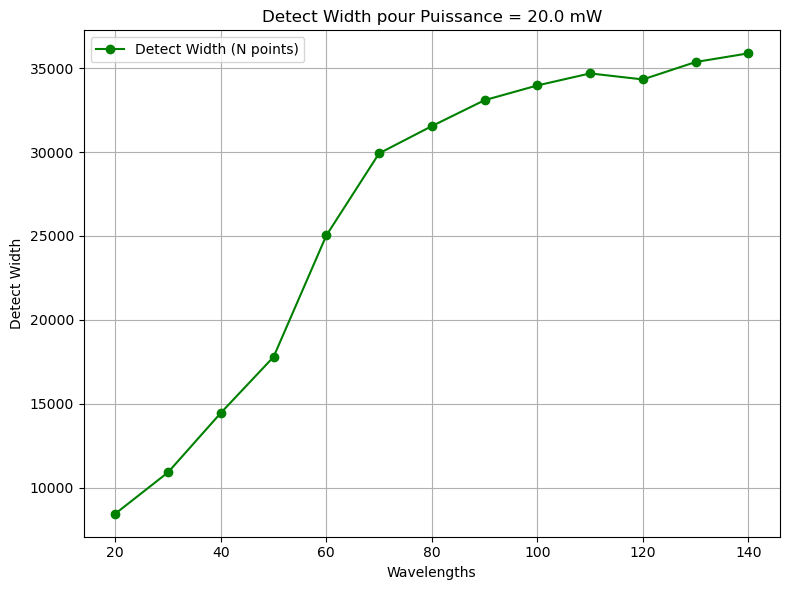

In [270]:
# Définir le nombre de voisins à inclure dans le calcul
N = 5  # Par exemple, somme sur 5 points les plus proches

# Initialiser les listes pour les counts, les maximums, les puissances, et les largeurs détectées
Counts_list = []
Maximums_list = []
Puissances_list = []
Detect_width_list = []

# Parcours de chaque couple trié par puissance
for couple in couples_profils_puissance_trie:
    
    valeur_puissance, couple_profil = couple[0], couple[1]
    
    # Extraction des longueurs d'onde (wavelengths) et des photons (intensité)
    wavelengths, photons = couple_profil[0], couple_profil[1]
    
    # Ajuster les photons en fonction de photons_bleu
    photons = photons - photons_bleu

    # Calculer la somme des photons (Counts) et le maximum
    Counts = photons.sum()
    Maximum = photons.max()

    # Calcul des sommes glissantes
    N = 25  # Remplacez par la taille de la fenêtre désirée
    sliding_sums = [
        sum(photons[max(0, i - N // 2): min(len(photons), i + N // 2 + 1)])
        for i in range(len(photons))
    ]
    
    # Trouver le maximum des sommes glissantes
    detect_width = max(sliding_sums)

    # Ajouter les valeurs dans les listes correspondantes
    Counts_list.append(Counts)
    Puissances_list.append(valeur_puissance)
    Maximums_list.append(Maximum)
    Detect_width_list.append(detect_width)

# Tracer les counts en fonction de la puissance
plt.figure(figsize=(8, 6))
plt.plot(np.array(Puissances_list), Counts_list, 'bo-', label='Counts vs Puissance')
plt.xlabel('Puissance (mW)')
plt.ylabel('Counts')
plt.title('Counts en fonction de la puissance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tracer les maximums en fonction de la puissance
plt.figure(figsize=(8, 6))
plt.plot(Puissances_list, Maximums_list, 'ro-', label='Maximums vs Puissance')
plt.xlabel('Puissance (mW)')
plt.ylabel('Maximums')
plt.title('Maximums en fonction de la puissance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Tracer Detect_width pour un profil particulier comme exemple
plt.figure(figsize=(8, 6))
plt.plot(np.array(Puissances_list), Detect_width_list, 'go-', label='Detect Width (N points)')
plt.xlabel('Wavelengths')
plt.ylabel('Detect Width')
plt.title(f'Detect Width pour Puissance = {Puissances_list[0]} mW')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


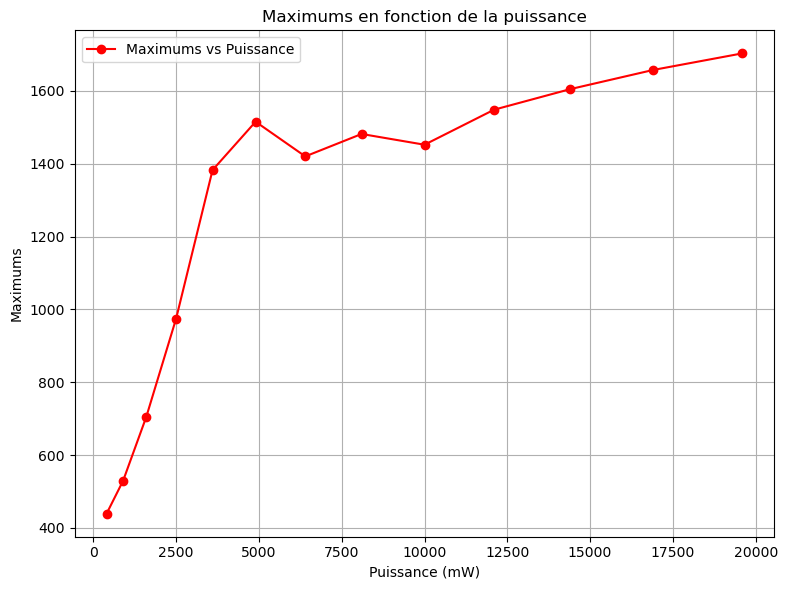

In [271]:
# Tracer les maximums en fonction de la puissance
plt.figure(figsize=(8, 6))
plt.plot(np.array(Puissances_list)**2, Maximums_list, 'ro-', label='Maximums vs Puissance')
plt.xlabel('Puissance (mW)')
plt.ylabel('Maximums')
plt.title('Maximums en fonction de la puissance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

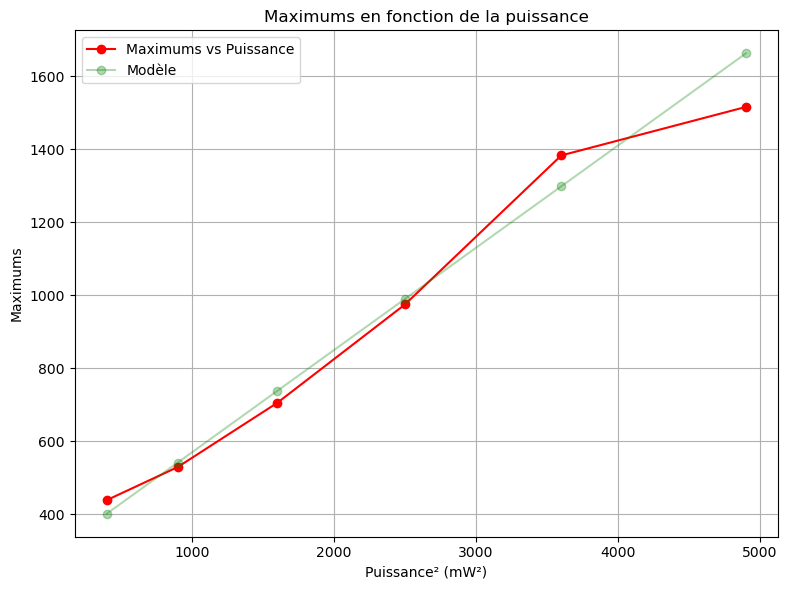

In [272]:
a = 0.28
b = 290

Modele = lambda x: a*x + b

# Tracer les maximums en fonction de la puissance
plt.figure(figsize=(8, 6))
plt.plot(np.array(Puissances_list[:6])**2, Maximums_list[:6], 'ro-', label='Maximums vs Puissance')
plt.plot(np.array(Puissances_list[:6])**2, Modele(np.array(Puissances_list[:6])**2), 'go-', label='Modèle', alpha=0.3)
plt.xlabel('Puissance² (mW²)')
plt.ylabel('Maximums')
plt.title('Maximums en fonction de la puissance')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()